In [1]:
import pyforest

In [15]:
df = pd.read_table(r'train_posts.txt', encoding = 'latin-1')

<IPython.core.display.Javascript object>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15629 entries, 0 to 15628
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post_id      15629 non-null  int64 
 1   post_text    15629 non-null  object
 2   user_id      15629 non-null  int64 
 3   image_id(s)  15629 non-null  object
 4   username     15629 non-null  object
 5   timestamp    15629 non-null  object
 6   label        15629 non-null  object
dtypes: int64(2), object(5)
memory usage: 854.8+ KB


In [20]:
df.head()

,post_id,post_text,user_id,image_id(s),username,timestamp,label
0,324597532548276224,Don't need feds to solve the #bostonbombing wh...,886672620,"boston_fake_03,boston_fake_35",SantaCruzShred,Wed Apr 17 18:57:37 +0000 2013,fake
1,325145334739267584,PIC: Comparison of #Boston suspect Sunil Tripa...,21992286,boston_fake_23,Oscar_Wang,Fri Apr 19 07:14:23 +0000 2013,fake
2,325152091423248385,I'm not completely convinced that it's this Su...,16428755,boston_fake_34,jamwil,Fri Apr 19 07:41:14 +0000 2013,fake
3,324554646976868352,Brutal lo que se puede conseguir en colaboraci...,303138574,"boston_fake_03,boston_fake_35",rubenson80,Wed Apr 17 16:07:12 +0000 2013,fake
4,324315545572896768,4chan and the bombing. just throwing it out th...,180460772,boston_fake_15,Slimlenny,Wed Apr 17 00:17:06 +0000 2013,fake


In [26]:
from dateutil.parser import parse
#parse('Wed Apr 17 18:57:37 +0000 2013')

datetime.datetime(2013, 4, 17, 18, 57, 37, tzinfo=tzutc())

In [35]:
def parse_time(x):
    try:
        x = parse(x)
    except:
        print(x)
    return x

In [36]:
df['Datetime'] = df['timestamp'].apply(lambda x: parse_time(x))

Tue Mar 11 23: 59: 22 +0000 2014
Tue Mar 11 13: 57: 22 +0000 2014
Tue Mar 11 03: 13: 40 +0000 2014
Tue Mar 11 03: 13: 40 +0000 2014
Mon Mar 10 22: 00: 13 +0000 2014
Mon Mar 10 21: 47: 50 +0000 2014
Mon Mar 10 21: 21: 02 +0000 2014
Mon Mar 10 19: 32: 38 +0000 2014
Mon Mar 10 14: 11: 23 +0000 2014
Mon Mar 17 11: 46: 36 +0000 2014
Mon Mar 17 08: 54: 26 +0000 2014
Sun Mar 16 03: 48: 40 +0000 2014
Fri Mar 14 17: 31: 06 +0000 2014
Thu Mar 13 20: 07: 05 +0000 2014
Thu Mar 13 02: 37: 05 +0000 2014
Thu Mar 13 00: 15: 44 +0000 2014
Tue Mar 11 16: 06: 41 +0000 2014
Tue Mar 11 12: 38: 51 +0000 2014
Tue Mar 11 03: 48: 36 +0000 2014
Mon Mar 10 18: 09: 26 +0000 2014
Mon Mar 10 10: 59: 45 +0000 2014
Sun Mar 09 20: 07: 10 +0000 2014
Sun Mar 09 16: 36: 09 +0000 2014


In [39]:
df['Datetime'].head()

0    2013-04-17 18:57:37+00:00
1    2013-04-19 07:14:23+00:00
2    2013-04-19 07:41:14+00:00
3    2013-04-17 16:07:12+00:00
4    2013-04-17 00:17:06+00:00
Name: Datetime, dtype: object

In [42]:
df['date'] =  pd.to_datetime(df['Datetime'], utc = True, errors = 'coerce')

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

<IPython.core.display.Javascript object>

In [43]:
df.head()

,post_id,post_text,user_id,image_id(s),username,timestamp,label,Datetime,date,day,month,year
0,324597532548276224,Don't need feds to solve the #bostonbombing wh...,886672620,"boston_fake_03,boston_fake_35",SantaCruzShred,Wed Apr 17 18:57:37 +0000 2013,fake,2013-04-17 18:57:37+00:00,2013-04-17 18:57:37+00:00,17.0,4.0,2013.0
1,325145334739267584,PIC: Comparison of #Boston suspect Sunil Tripa...,21992286,boston_fake_23,Oscar_Wang,Fri Apr 19 07:14:23 +0000 2013,fake,2013-04-19 07:14:23+00:00,2013-04-19 07:14:23+00:00,19.0,4.0,2013.0
2,325152091423248385,I'm not completely convinced that it's this Su...,16428755,boston_fake_34,jamwil,Fri Apr 19 07:41:14 +0000 2013,fake,2013-04-19 07:41:14+00:00,2013-04-19 07:41:14+00:00,19.0,4.0,2013.0
3,324554646976868352,Brutal lo que se puede conseguir en colaboraci...,303138574,"boston_fake_03,boston_fake_35",rubenson80,Wed Apr 17 16:07:12 +0000 2013,fake,2013-04-17 16:07:12+00:00,2013-04-17 16:07:12+00:00,17.0,4.0,2013.0
4,324315545572896768,4chan and the bombing. just throwing it out th...,180460772,boston_fake_15,Slimlenny,Wed Apr 17 00:17:06 +0000 2013,fake,2013-04-17 00:17:06+00:00,2013-04-17 00:17:06+00:00,17.0,4.0,2013.0


In [52]:
#pd.to_numeric(df['year'], downcast='integer')
df.fillna(0, inplace = True)
df = df.astype({"year": int})

In [61]:
df['year'].value_counts()

2012    10222
2014     2856
2015     1995
2013      533
0          23
Name: year, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

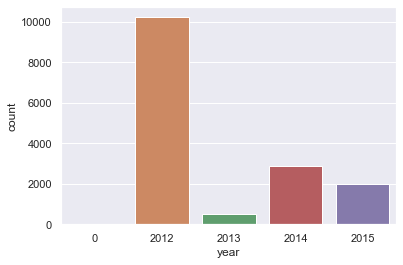

In [84]:
sns.set_theme(style="darkgrid")

sns.countplot(x = 'year', data = df)
plt.savefig('count_plot_with.pdf') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

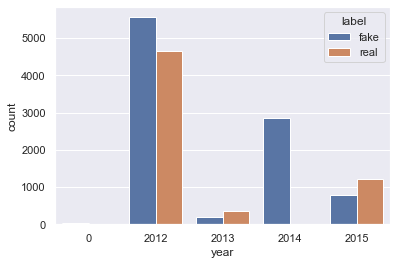

In [83]:
sns.countplot(x = 'year', data = df, hue = 'label')
plt.savefig('count_plot_with_hue.pdf') 

In [93]:
# topic extraction from image_ids
def topic(x):
    x = str(x)
    return x.split('_')[0]

df['topics'] = df['image_id(s)'].apply(topic)

In [94]:
df['topics'].value_counts()

sandy                 10222
syrianboy              1786
nepal                  1360
boston                  533
malaysia                310
eclipse                 277
sochi                   274
samurai                 218
columbianChemicals      185
bringback               131
underwater              113
garissa                  79
varoufakis               61
passport                 44
pigFish                  14
elephant                 13
livr                      9
Name: topics, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

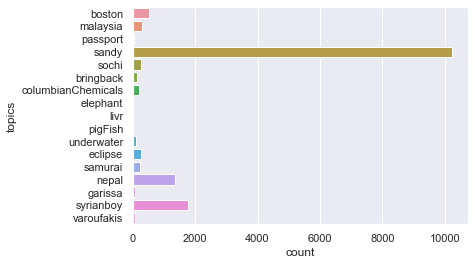

In [102]:
# Topics wrt each year
sns.countplot(y = 'topics', data = df)
plt.savefig('count_plot_topics.pdf') 

In [136]:
df = df.astype({"year": str})
df = df.astype({"month": int})
df = df.astype({"month": str})

<IPython.core.display.Javascript object>

<BarContainer object of 15629 artists>

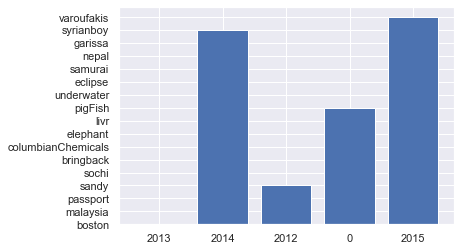

In [106]:
plt.bar(df['year'], df['topics']) 

<IPython.core.display.Javascript object>

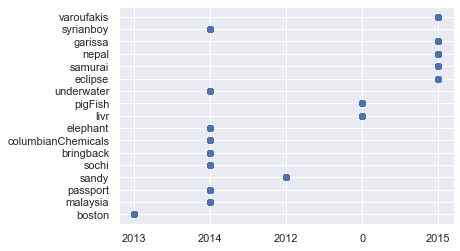

In [107]:
plt.scatter(df['year'], df['topics'])

In [111]:
# in year 2012, # of topics
y1 = df[df['year'] == '2012']['topics']
y2 = df[df['year'] == '2013']['topics']
y3 = df[df['year'] == '2014']['topics']
y4 = df[df['year'] == '2015']['topics']

In [122]:
y4.value_counts()

nepal         1360
eclipse        277
samurai        218
garissa         79
varoufakis      61
Name: topics, dtype: int64

In [123]:
print(y1.value_counts().shape)
print(y2.value_counts().shape)
print(y3.value_counts().shape)
print(y4.value_counts().shape)

(1,)
(1,)
(8,)
(5,)


In [168]:
print(y1.value_counts())

print(y2.value_counts())
print(y3.value_counts())
print(y4.value_counts())

sandy    10222
Name: topics, dtype: int64
boston    533
Name: topics, dtype: int64
syrianboy             1786
malaysia               310
sochi                  274
columbianChemicals     185
bringback              131
underwater             113
passport                44
elephant                13
Name: topics, dtype: int64
nepal         1360
eclipse        277
samurai        218
garissa         79
varoufakis      61
Name: topics, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

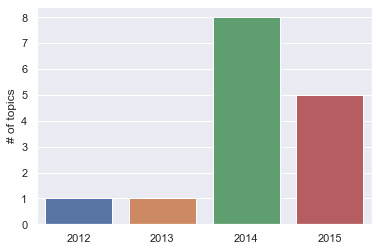

In [206]:
# number of topics wrt each year
sns.barplot(x = [2012, 2013, 2014, 2015], y = [1, 1, 8, 5])
plt.ylabel('# of topics')
plt.savefig('bar_plot_noOftopics_wrt_year.pdf') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

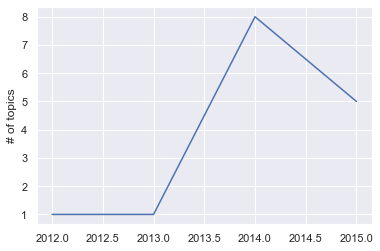

In [207]:
plt.plot([2012, 2013, 2014, 2015], [1, 1, 8, 5])
plt.ylabel('# of topics')
plt.savefig('line_plot_noOftopics_wrt_year.pdf') 

In [138]:
# 2012, monthwise topic analysis
df[df['year'] == '2012']['month'].value_counts()

10    6424
11    3798
Name: month, dtype: int64

In [179]:
y2012_month = df[df['year'] == '2012']['month_categorical']
y2012_topics = df[df['year'] == '2012']['topics']

In [153]:
print(y2012_topics.value_counts().shape)
y2012_month.value_counts().shape

(1,)


(2,)

<IPython.core.display.Javascript object>

C:\Users\shakshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

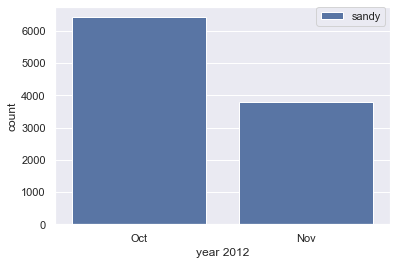

In [208]:
sns.countplot(y2012_month, hue = y2012_topics)
plt.legend(bbox_to_anchor=(0.78, 1), loc='upper left', borderaxespad=0)
plt.xlabel('year 2012')
plt.savefig('count_plot_2012_topicwise.pdf') 

<IPython.core.display.Javascript object>

C:\Users\shakshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

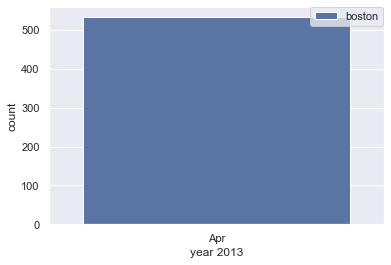

In [209]:
sns.countplot(df[df['year'] == '2013']['month_categorical'], hue = df[df['year'] == '2013']['topics'])
plt.legend(bbox_to_anchor=(0.78, 1), loc='upper left', borderaxespad=0)
plt.xlabel('year 2013')
plt.savefig('count_plot_2013_topicwise.pdf') 

<IPython.core.display.Javascript object>

C:\Users\shakshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

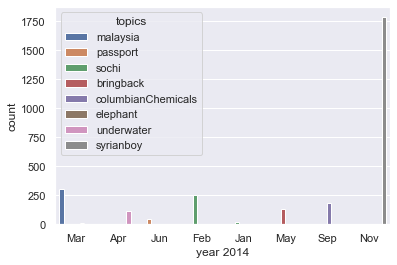

In [210]:
sns.countplot(df[df['year'] == '2014']['month_categorical'], hue = df[df['year'] == '2014']['topics'])
plt.xlabel('year 2014')
plt.savefig('count_plot_2014_topicwise.pdf') 

In [213]:
 df[df['year'] == '2014']['topics'].value_counts()

syrianboy             1786
malaysia               310
sochi                  274
columbianChemicals     185
bringback              131
underwater             113
passport                44
elephant                13
Name: topics, dtype: int64

In [173]:
import calendar
df = df.astype({"month": int})
df['month_categorical'] = df['month'].apply(lambda x: calendar.month_abbr[x])
#df['month_categorical'] = df['month'].apply

<IPython.core.display.Javascript object>

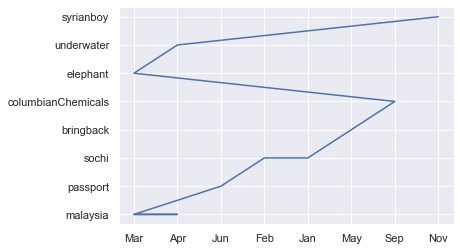

In [175]:
plt.plot(df[df['year'] == '2014']['month_categorical'], df[df['year'] == '2014']['topics'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

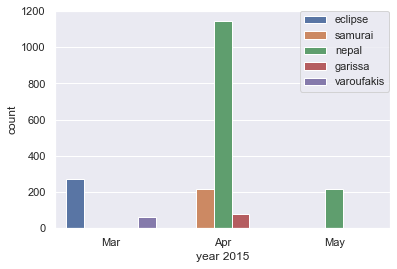

In [211]:
sns.countplot(x = df[df['year'] == '2015']['month_categorical'], hue = df[df['year'] == '2015']['topics'])
plt.legend(bbox_to_anchor=(0.73, 1), loc='upper left', borderaxespad=0)
plt.xlabel('year 2015')
plt.savefig('count_plot_2015_topicwise.pdf') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

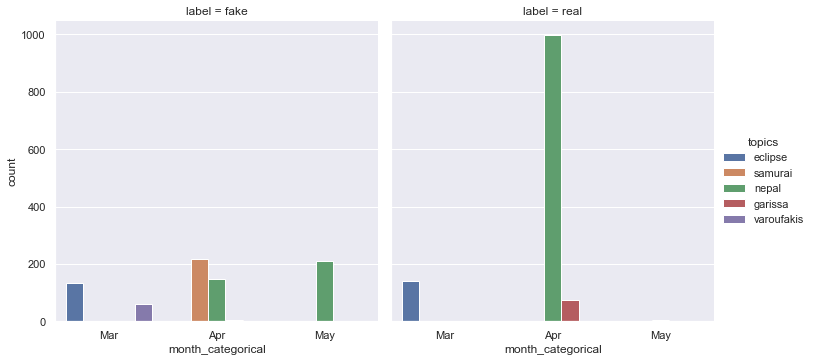

In [227]:
df2015 = df[df['year'] == '2015']
sns.catplot(x = 'month_categorical', hue = 'topics', data = df2015, kind = 'count', col = 'label')
#plt.legend(bbox_to_anchor=(0.73, 1), loc='upper left', borderaxespad=0)
#plt.xlabel('year 2015')
plt.savefig('count_plot_2015_topic_labelwise.pdf')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

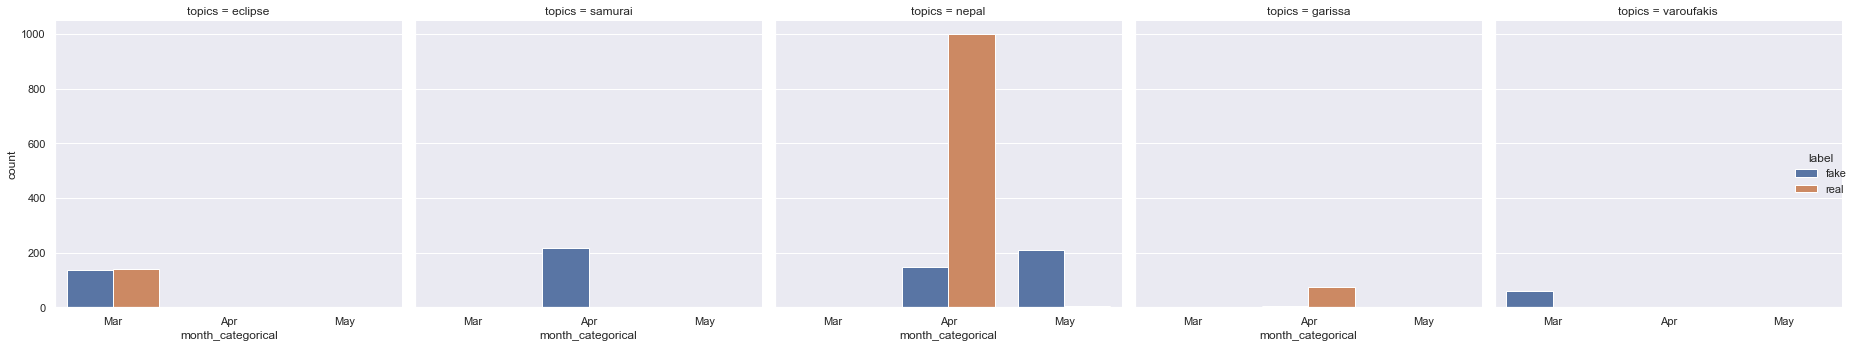

In [253]:
sns.catplot(x = 'month_categorical', col = 'topics', data = df2015, kind = 'count', hue = 'label')
plt.tight_layout()
plt.xlabel(' ')
plt.savefig('count_plot_2015_topic_labelwise1.pdf')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

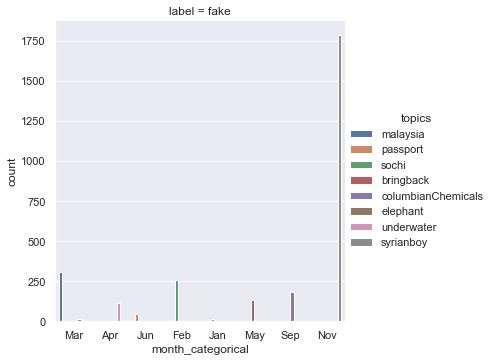

In [231]:
df2014 = df[df['year'] == '2014']
sns.catplot(x = 'month_categorical', hue = 'topics', data = df2014, kind = 'count', col = 'label')
#plt.legend(bbox_to_anchor=(0.73, 1), loc='upper left', borderaxespad=0)
plt.savefig('count_plot_2014_topic_labelwise.pdf')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

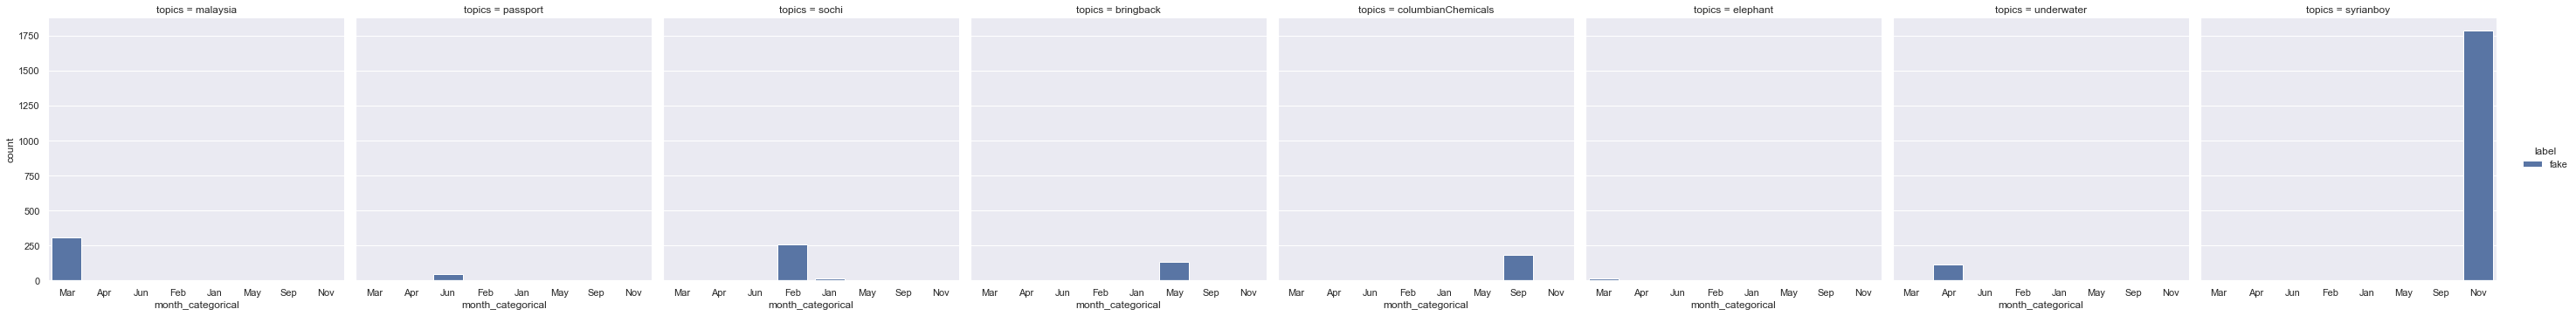

In [255]:
sns.catplot(x = 'month_categorical', col = 'topics', data = df2014, kind = 'count', hue = 'label')
#plt.tight_layout()
plt.xlabel('')
plt.savefig('count_plot_2014_topic_labelwise1.pdf')  

In [232]:
df[df['year'] == '2014']['label'].value_counts()

fake    2856
Name: label, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

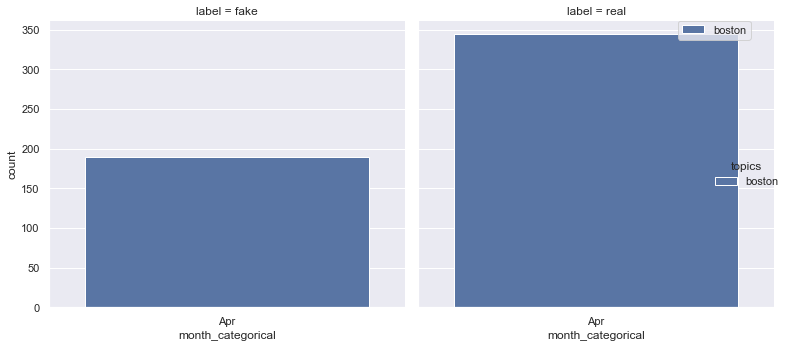

In [244]:
df2013 = df[df['year'] == '2013']
sns.catplot(x = 'month_categorical', hue = 'topics', data = df2013, kind = 'count', col = 'label')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.73, 1), loc='upper left', borderaxespad=0)
plt.savefig('count_plot_2013_topic_labelwise.pdf')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

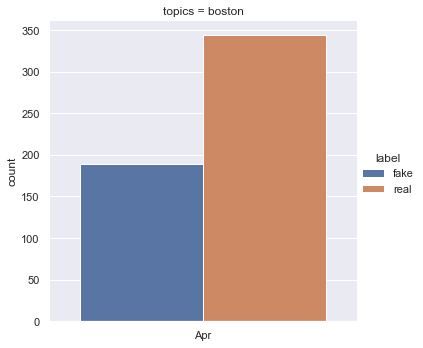

In [247]:
sns.catplot(x = 'month_categorical', col = 'topics', data = df2013, kind = 'count', hue = 'label')
plt.xlabel('')
plt.savefig('count_plot_2013_topic_labelwise1.pdf')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

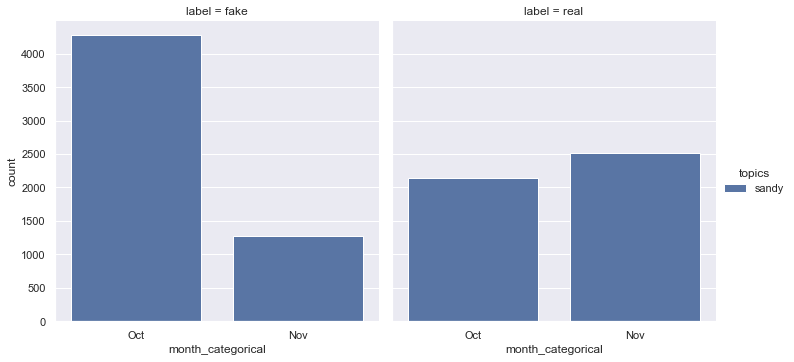

In [234]:
df2012 = df[df['year'] == '2012']
sns.catplot(x = 'month_categorical', hue = 'topics', data = df2012, kind = 'count', col = 'label')
#plt.legend(bbox_to_anchor=(0.73, 1), loc='upper left', borderaxespad=0)
plt.savefig('count_plot_2012_topic_labelwise.pdf')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

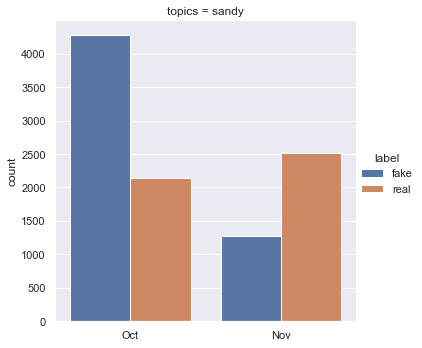

In [248]:
sns.catplot(x = 'month_categorical', col = 'topics', data = df2012, kind = 'count', hue = 'label')
plt.xlabel('')

plt.savefig('count_plot_2012_topic_labelwise1.pdf')  

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='topics', ylabel='Count'>

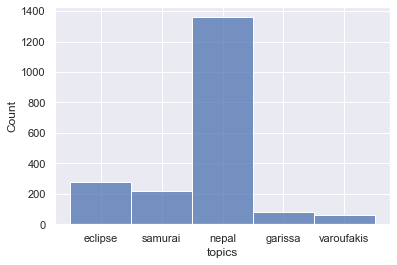

In [263]:
sns.histplot(df2015['topics'])
#plt.plot(df2015['label'])
#plt.plot(df2015['month_categorical'])

In [224]:
df[df['year'] == '2015']['label'].value_counts()

real    1217
fake     778
Name: label, dtype: int64

In [215]:
df[df['year'] == '2015']['topics'].value_counts()

nepal         1360
eclipse        277
samurai        218
garissa         79
varoufakis      61
Name: topics, dtype: int64

In [216]:
df[df['year'] == '2015']['month_categorical'].value_counts()

Apr    1444
Mar     335
May     216
Name: month_categorical, dtype: int64

In [256]:
# year wise, topic wise, month wise, labelwise 60:40 ratio
df.label.value_counts()

fake    9404
real    6225
Name: label, dtype: int64